In [56]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [57]:
!kaggle datasets download -d volkandl/car-brand-logos

car-brand-logos.zip: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
from zipfile import ZipFile
dataset = '/content/car-brand-logos.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [60]:
train_folder=os.listdir('/content/Car_Brand_Logos/Train')
print(train_folder)
print(len(train_folder))

['skoda', 'hyundai', 'mazda', 'opel', 'mercedes', 'volkswagen', 'toyota', 'lexus']
8


In [78]:
data=[]

In [79]:
for i in range(8):
  folder_path='/content/Car_Brand_Logos/Train/'+train_folder[i]
  img_folder=os.listdir(folder_path)
  l=len(img_folder)
  for j in range(l):
    img_path=folder_path+'/'+img_folder[j]
    img_pillow=Image.open(img_path)
    img_color=img_pillow.convert('RGB')
    img_resize=img_color.resize((64,64))
    img_arr=np.array(img_resize)
    data.append([img_arr,train_folder[i]])

In [90]:
x=[]
y=[]
for i,j in data:
  x.append(i)
  y.append(j)

In [91]:
t=np.unique(y)
print(t)
print(len(t))

['hyundai' 'lexus' 'mazda' 'mercedes' 'opel' 'skoda' 'toyota' 'volkswagen']
8


In [92]:
x=np.array(x)
y=np.array(y)

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

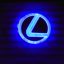

In [98]:
cv2_imshow(x_train[0])

In [99]:
y_train[0]

'lexus'

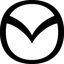

In [100]:
cv2_imshow(x_train[1])

In [101]:
y_train[1]

'mazda'

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)

In [108]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [109]:
import tensorflow as tf
from tensorflow import keras

In [110]:
num_of_classes=8
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [111]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [112]:
model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.1)

64/64 [==============================] - 0s 6ms/step - loss: 0.1027 - accuracy: 0.9690 - val_loss: 2.4710 - val_accuracy: 0.6432
Epoch 96/100
64/64 [==============================] - 0s 6ms/step - loss: 0.1002 - accuracy: 0.9735 - val_loss: 2.6408 - val_accuracy: 0.6476
Epoch 97/100
64/64 [==============================] - 0s 6ms/step - loss: 0.0616 - accuracy: 0.9818 - val_loss: 2.6539 - val_accuracy: 0.6564
Epoch 98/100
64/64 [==============================] - 0s 7ms/step - loss: 0.0935 - accuracy: 0.9739 - val_loss: 2.4457 - val_accuracy: 0.6696
Epoch 99/100
64/64 [==============================] - 0s 6ms/step - loss: 0.0929 - accuracy: 0.9715 - val_loss: 2.4818 - val_accuracy: 0.6652
Epoch 100/100
64/64 [==============================] - 0s 6ms/step - loss: 0.0936 - accuracy: 0.9730 - val_loss: 2.8535 - val_accuracy: 0.6608


In [121]:
img_path='/content/hyundai.png'
img_pillow=Image.open(img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((64,64))
img_arr=np.array(img_resize)
img_scaled=img_arr/255
img_reshape=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshape)
output=np.argmax(prediction)
if(output==0):
  print('The LOGO is HYUNDAI')
elif(output==1):
  print('The LOGO is LEXUS')
elif(output==2):
  print('The LOGO is MAZDA')
elif(output==3):
  print('The LOGO is MERCEDES')
elif(output==4):
  print('The LOGO is OPEL')
elif(output==5):
  print('The LOGO is SKODA')
elif(output==6):
  print('The LOGO is TOYOTA')
elif(output==7):
  print('The LOGO is VOLKSWAGEN')

1/1 [==============================] - 0s 17ms/step
The LOGO is HYUNDAI
